#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [1]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [2]:
X=torch.rand(4,3)
Y=torch.rand(4,3)
print(torch.cat([X,Y],dim=0))
print(torch.cat([X,Y],dim=1))

tensor([[0.9411, 0.2747, 0.5510],
        [0.1452, 0.7956, 0.4310],
        [0.0903, 0.6072, 0.4079],
        [0.2394, 0.8512, 0.0059],
        [0.2428, 0.3618, 0.7573],
        [0.1528, 0.5934, 0.0237],
        [0.5621, 0.2962, 0.9063],
        [0.7744, 0.6170, 0.8090]])
tensor([[0.9411, 0.2747, 0.5510, 0.2428, 0.3618, 0.7573],
        [0.1452, 0.7956, 0.4310, 0.1528, 0.5934, 0.0237],
        [0.0903, 0.6072, 0.4079, 0.5621, 0.2962, 0.9063],
        [0.2394, 0.8512, 0.0059, 0.7744, 0.6170, 0.8090]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [3]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [5]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) #torch.normal(mean,std,size=(numexaples,len(w)):출력텐서)
    y = torch.matmul(X, w) + b #matmul : 인수의 종류에 따라서 자동으로 dot(벡터 내적), mv(행렬과 벡터의 곱), mm(행렬과 행렬의 곱)을 선택
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [6]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.1471,  0.8624]) 
label: tensor([3.7642])


In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4468, -1.3419],
        [-0.4761,  0.8017],
        [ 0.7856, -0.8440],
        [-0.9725,  1.5631],
        [-0.6706, -1.2111],
        [-1.6767, -1.5040],
        [ 0.6042, -1.8007],
        [ 1.1632, -1.2086],
        [ 0.1469, -2.5244],
        [-0.6283,  1.3188],
        [ 0.3751,  0.6446],
        [ 0.6913,  0.1483],
        [-1.3350, -2.8162],
        [-0.0218, -1.3477],
        [-0.0712,  0.0030],
        [-1.2079, -0.6588],
        [-0.0645,  1.2950],
        [-0.8030,  0.3343],
        [-1.1655, -2.1765],
        [-0.8465,  0.7422]]) 
 tensor([[ 8.8614],
        [ 2.8882],
        [ 9.1007],
        [ 0.2446],
        [ 5.3136],
        [ 2.7262],
        [ 9.9918],
        [10.8102],
        [ 9.7355],
        [ 1.6221],
        [ 5.6494],
        [ 7.3563],
        [ 5.7197],
        [ 7.4491],
        [ 5.2702],
        [ 2.8611],
        [ 3.3658],
        [ 2.5974],
        [ 5.2742],
        [ 1.8383]])


In [9]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([5.5])

In [10]:
print(w)

tensor([[-0.0029],
        [-0.0121]], requires_grad=True)


In [11]:
print(b)

tensor([5.5000])


In [12]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w) + b

In [13]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [14]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
          param -= lr * param.grad / batch_size
          param.grad.zero_()

In [15]:
lr = 0.001
num_epochs = 30
net = linreg
loss = squared_loss

w0 = []
w1 = []
b_l = []
loss_arr_w0 = []
loss_arr_w1 = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X , w, b), y) 
        # Compute gradient on `l` with respect to [`w`]
        l.sum().backward()
        sgd([w], lr, batch_size) # update 파라미터에서 b 제외
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        
        w0.append(w.tolist()[0])
        w1.append(w.tolist()[1])
        b_l.append(b.tolist())
        loss_arr_w0.append(train_l[0].mean())
        loss_arr_w1.append(train_l[1].mean())

epoch 1, loss 4.436409
epoch 2, loss 3.663480
epoch 3, loss 3.025215
epoch 4, loss 2.498158
epoch 5, loss 2.062930
epoch 6, loss 1.703534
epoch 7, loss 1.406750
epoch 8, loss 1.161672
epoch 9, loss 0.959292
epoch 10, loss 0.792176
epoch 11, loss 0.654172
epoch 12, loss 0.540210
epoch 13, loss 0.446104
epoch 14, loss 0.368394
epoch 15, loss 0.304224
epoch 16, loss 0.251231
epoch 17, loss 0.207472
epoch 18, loss 0.171335
epoch 19, loss 0.141494
epoch 20, loss 0.116852
epoch 21, loss 0.096503
epoch 22, loss 0.079700
epoch 23, loss 0.065823
epoch 24, loss 0.054364
epoch 25, loss 0.044901
epoch 26, loss 0.037088
epoch 27, loss 0.030635
epoch 28, loss 0.025306
epoch 29, loss 0.020906
epoch 30, loss 0.017272


In [16]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.1690, -0.0862], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.])


In [17]:
print(loss_arr_w0)

[tensor(1.2314), tensor(1.0182), tensor(0.8420), tensor(0.6962), tensor(0.5757), tensor(0.4761), tensor(0.3937), tensor(0.3255), tensor(0.2692), tensor(0.2226), tensor(0.1841), tensor(0.1522), tensor(0.1259), tensor(0.1041), tensor(0.0861), tensor(0.0712), tensor(0.0589), tensor(0.0487), tensor(0.0403), tensor(0.0333), tensor(0.0276), tensor(0.0228), tensor(0.0189), tensor(0.0156), tensor(0.0129), tensor(0.0107), tensor(0.0088), tensor(0.0073), tensor(0.0061), tensor(0.0050)]


In [18]:
w0

[[0.2718007564544678],
 [0.5213818550109863],
 [0.7481280565261841],
 [0.9541330933570862],
 [1.141282558441162],
 [1.3113131523132324],
 [1.4657893180847168],
 [1.6061302423477173],
 [1.7336293458938599],
 [1.8494619131088257],
 [1.9547008275985718],
 [2.0503129959106445],
 [2.137178421020508],
 [2.216094732284546],
 [2.287790060043335],
 [2.352928638458252],
 [2.41210675239563],
 [2.465874433517456],
 [2.514723539352417],
 [2.559105634689331],
 [2.599424362182617],
 [2.6360561847686768],
 [2.669337272644043],
 [2.699573516845703],
 [2.7270450592041016],
 [2.7520017623901367],
 [2.774677038192749],
 [2.7952780723571777],
 [2.8139944076538086],
 [2.830998182296753]]

In [19]:
loss_arr_w1

[tensor(3.5008),
 tensor(2.8914),
 tensor(2.3882),
 tensor(1.9726),
 tensor(1.6294),
 tensor(1.3460),
 tensor(1.1119),
 tensor(0.9185),
 tensor(0.7588),
 tensor(0.6269),
 tensor(0.5180),
 tensor(0.4280),
 tensor(0.3537),
 tensor(0.2923),
 tensor(0.2415),
 tensor(0.1996),
 tensor(0.1650),
 tensor(0.1364),
 tensor(0.1128),
 tensor(0.0933),
 tensor(0.0771),
 tensor(0.0638),
 tensor(0.0528),
 tensor(0.0437),
 tensor(0.0361),
 tensor(0.0299),
 tensor(0.0248),
 tensor(0.0205),
 tensor(0.0170),
 tensor(0.0141)]

In [20]:
w1

[[-0.14665305614471436],
 [-0.2690679132938385],
 [-0.3804185688495636],
 [-0.4816916584968567],
 [-0.5738223195075989],
 [-0.6576129794120789],
 [-0.7338290810585022],
 [-0.8031614422798157],
 [-0.8662295341491699],
 [-0.9235926270484924],
 [-0.9757664799690247],
 [-1.0232224464416504],
 [-1.0663845539093018],
 [-1.1056464910507202],
 [-1.141356110572815],
 [-1.1738383769989014],
 [-1.2033833265304565],
 [-1.2302521467208862],
 [-1.2546930313110352],
 [-1.276916742324829],
 [-1.2971352338790894],
 [-1.3155221939086914],
 [-1.3322489261627197],
 [-1.3474618196487427],
 [-1.3612972497940063],
 [-1.3738826513290405],
 [-1.3853296041488647],
 [-1.3957395553588867],
 [-1.4052067995071411],
 [-1.4138193130493164]]

In [21]:
b_l

[[5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5]]

+cost graph 그리기 (x축 w, y축 loss)

In [22]:
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.5 requires matplotlib==3.5.1, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Text(0, 0.5, 'loss')

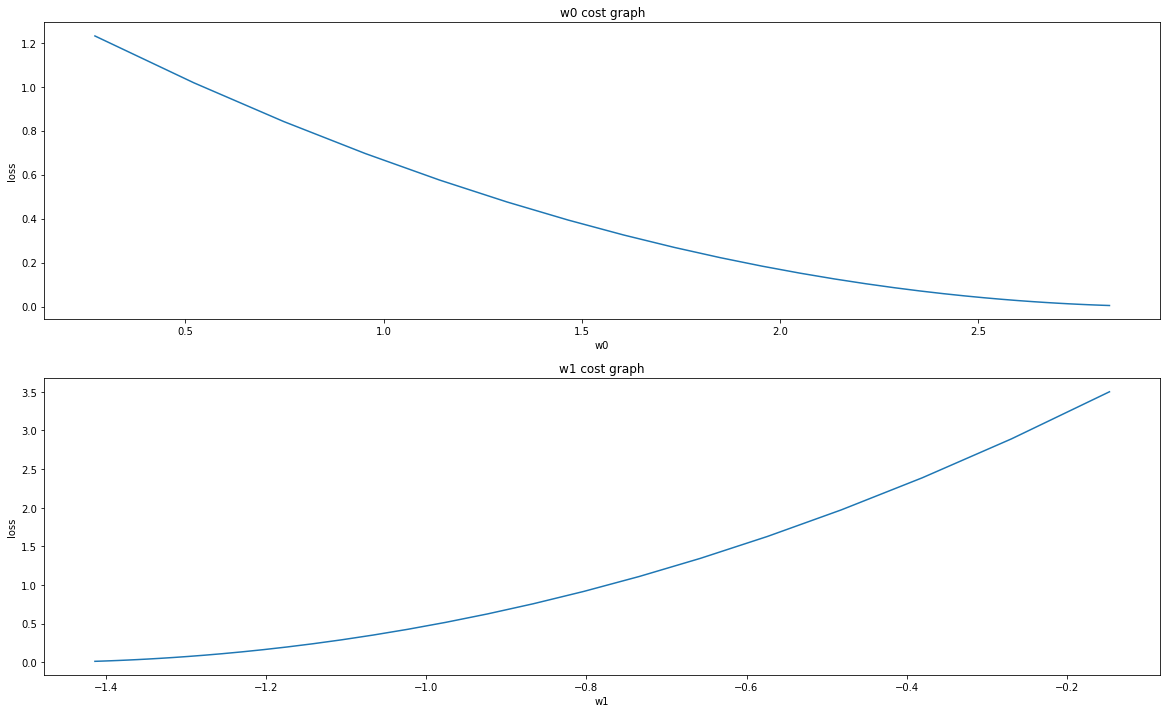

In [23]:
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
plt.plot(w0,loss_arr_w0)
plt.title('w0 cost graph')
plt.xlabel('w0')
plt.ylabel('loss')

plt.subplot(2,1,2)
plt.plot(w1,loss_arr_w1)
plt.title('w1 cost graph')
plt.xlabel('w1')
plt.ylabel('loss')


concise implementation of linear regression 
- api 사용해보기

In [24]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [25]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [26]:
next(iter(data_iter))

[tensor([[-0.9169, -0.7451],
         [-0.7123, -1.5787],
         [-0.4030, -0.2288],
         [ 1.3210, -0.5476],
         [ 0.0789,  1.1702],
         [ 1.0122, -2.5156],
         [ 1.0159,  0.3862],
         [-0.8792,  0.4887],
         [ 1.3609,  0.8133],
         [ 1.0029, -1.8617],
         [ 0.5331,  0.0573],
         [ 0.0337,  0.0191],
         [-1.0551, -1.8057],
         [-1.3917,  1.0012],
         [-0.3229, -0.2396],
         [ 2.0947,  1.4487],
         [-0.6180, -0.4562],
         [-0.7697, -0.4421],
         [-0.4238, -0.5577],
         [-0.6271,  0.1602]]), tensor([[ 3.8771],
         [ 5.7376],
         [ 4.6410],
         [10.2909],
         [ 3.9751],
         [12.3021],
         [ 7.9659],
         [ 2.1401],
         [ 8.3703],
         [11.3019],
         [ 7.0253],
         [ 5.5654],
         [ 5.0337],
         [-0.1666],
         [ 4.8836],
         [ 9.6037],
         [ 4.3254],
         [ 3.8621],
         [ 5.0590],
         [ 3.3780]])]

In [27]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [28]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [29]:
loss = nn.MSELoss() #L1도 가능

In [30]:
import torch.optim as optim
trainer = optim.SGD(net.parameters(),lr=0.01)

In [31]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
      l = loss(net(X),y)
      trainer.zero_grad()
      l.backward()
      trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.818529
epoch 2, loss 0.016943
epoch 3, loss 0.000450


In [32]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0103, -0.0051])
error in estimating b: tensor([0.0151])
